In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

/var/folders/30/xm8738cn5b3g6707w_6b0w740000gn/T/ipykernel_24084/390224851.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(input_array)


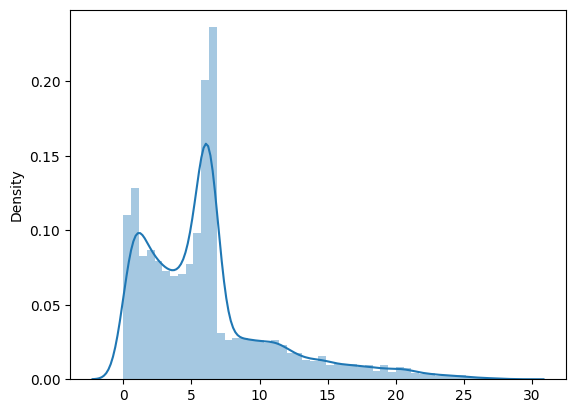

In [2]:
input = pd.read_csv(r"/Users/simo/VScode/rainfall_prediction/data/24h_10mmMAX_OI/obs/data/OI_20220528_regrid.csv", sep=';')
# Convert Pandas dataframe to numpy array
input_array = input.to_numpy()
input_array = input_array.reshape(input_array.shape[0]*input_array.shape[1])
#plot histogram
sns.distplot(input_array)
plt.show()

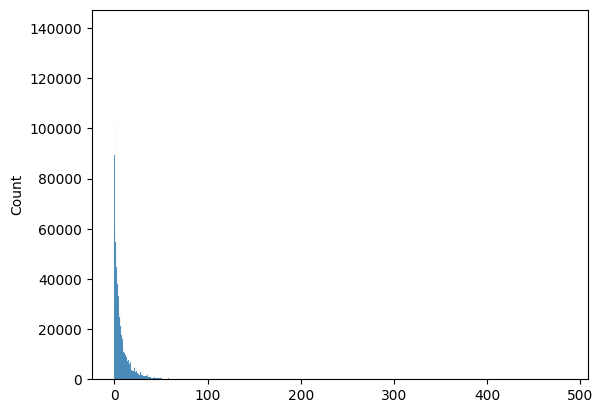

In [3]:
# Load all CSV files in a directory
pt = '/Users/simo/VScode/rainfall_prediction/data/24h_10mmMAX_OI/obs'
data_dir = Path(pt, "data")
input_files = list(data_dir.glob("*.csv"))

inputs = []
for file in input_files:
    input = pd.read_csv(file, sep=';')
    input_array = input.to_numpy()
    input_array = input_array.reshape(input_array.shape[0] * input_array.shape[1])
    #inx = np.where(input_array >100)
    #input_array[inx] = 100
    inputs.append(input_array)

# Concatenate all input arrays into a single numpy array
input_array = np.concatenate(inputs)
sns.histplot(input_array)
plt.show()


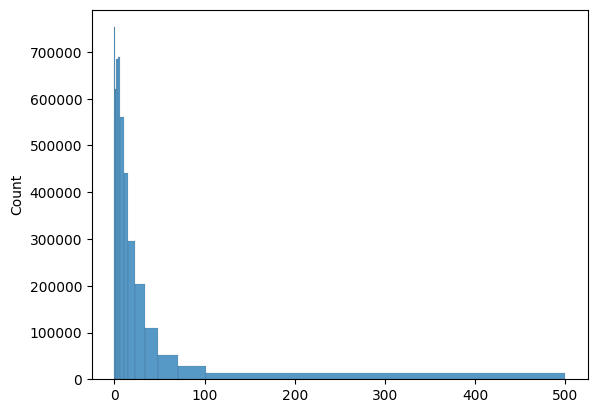

In [4]:
#bin=np.histogram_bin_edges(input_array, bins='sqrt')
# Plot histogram
bins = np.exp(np.linspace(0, 5, 15))-2
bins = bins[2:]
bins[-1]=500
sns.histplot(input_array, bins=bins)
plt.show()

In [5]:
bins, len(bins)

(array([4.27270703e-02, 9.19547304e-01, 2.17273388e+00, 3.96383831e+00,
        6.52375646e+00, 1.01824940e+01, 1.54117081e+01, 2.28855102e+01,
        3.35673674e+01, 4.88343053e+01, 7.06544242e+01, 1.01840612e+02,
        5.00000000e+02]),
 13)

In [13]:
import torch
a = torch.Tensor([[[1, 2, 3], [4,5,6], [7,8,9]], [[3, 2, 3], [4,5,6], [9,8, 9]]])
b = torch.Tensor([[1,0,1], [0,0,0], [1,1,0]])

c = torch.matmul(a, b.transpose(0,1))
a,b,c


(tensor([[[1., 2., 3.],
          [4., 5., 6.],
          [7., 8., 9.]],
 
         [[3., 2., 3.],
          [4., 5., 6.],
          [9., 8., 9.]]]),
 tensor([[1., 0., 1.],
         [0., 0., 0.],
         [1., 1., 0.]]),
 tensor([[[ 4.,  0.,  3.],
          [10.,  0.,  9.],
          [16.,  0., 15.]],
 
         [[ 6.,  0.,  5.],
          [10.,  0.,  9.],
          [18.,  0., 17.]]]))

In [14]:
c = a*b
c

tensor([[[1., 0., 3.],
         [0., 0., 0.],
         [7., 8., 0.]],

        [[3., 0., 3.],
         [0., 0., 0.],
         [9., 8., 0.]]])